# DSCI 100 Group 28 Project Proposal:

## Title: Predictability of Heart Disease From Clinical Factors

#### Authors:
##### Ivy Li 80002512
##### Wendy Liang 26036525
##### Julia Hudea 18271156

### Introduction:
Heart disease is prevalent in people older in age, with irregular blood flow, and a high amount of fat deposits in blood vessels. Blood flow is associated with heart rate, resting cardiac performance, and chest pains (angina), whereas the number of fat deposits is reflected by cholesterol levels. Atypical angina and non-anginal pain are not heart-related. 

We will investigate whether or not it is possible to predict the likelihood of an individual having heart disease based on regular clinical assessments associated with the disease through a classification model. Specifically, we will be trying to predict the risk of heart disease based on the following five factors: (1) age, (2) maximum heart rate, (3) serum cholesterol, (4) resting electrocardiographic results, and (5) type of chest pain.

We will use the dataset “reprogressed.hungarian.data” taken from the UCI Machine Learning Repository. The dataset contains 14 variables associated with heart disease, of which we will extract 5 (listed above) to help us answer the question. Variables (1)-(3) are numerical data, whereas (4) resting electrocardiographic results (0=normal, 1=abnormal) and (5) type of chest pain (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic) are categorical. Heart disease is also a categorical data (0=un-diagnosed, or 1=diagnosed).


### Preliminary Exploratory Data Analysis:

In [1]:
library(tidyverse) 
library(tidymodels)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


ERROR: Error in library(tidymodels): there is no package called 'tidymodels'


#### LEGEND:

1. age = age
2. sex = sex (1/0)
3. cp = chest pain (4 classifications)
4. trestbps = resting blood pressure (mm Hg)
5. chol = serum cholestrol (mg/dl)
6. fbs = fasting blood sugar (1/0, yes/no)
7. restecg = resting electrocardiographic results  (3 classifications)
8. thalach = maximum heart rate achieved 
9. exang = exercise induced angina (1/0, yes/no)
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope = slope of the peak exercise ST segment  (3 classifications)
12. ca = number of major vessels (0-3) colored by flourosopy 
13. hal = histidine ammonia-lyase (HAL) gene : 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num = diagnosis of heart disease (angiographic disease status) (0/1) 	-- Value 0: < 50% diameter narrowing  	-- Value 1: > 50% diameter narrowing 


----

### 1) Data Reading and Tidying

In [11]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
hungarian_heart_disease_data <- read.csv(url, header = FALSE, na.strings = "?")
colnames(hungarian_heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
mutate(hungarian_heart_disease_data, num = as_factor(num)) |>
slice(1:10)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0


In [12]:
tidy_hungarian_heart_disease_data <- hungarian_heart_disease_data |>
    mutate(patient_id = row_number())
slice(tidy_hungarian_heart_disease_data, 1:10)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,patient_id
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,1
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,2
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,3
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0,4
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0,5
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0,6
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0,7
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0,8
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0,9


In [13]:
heart_disease_data_scaled <- tidy_hungarian_heart_disease_data |> 
    select(age:thal) |>
    mutate_all(scale, center = TRUE) |>
    bind_cols(tidy_hungarian_heart_disease_data |> select(patient_id, num))
slice(heart_disease_data_scaled, 1:10)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,patient_id,num
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>
-2.538019,0.6156202,-1.0185225,-0.1465752,-1.75661733,-0.2737245,3.865688,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,1,0
-2.410008,0.6156202,-1.0185225,-0.7139006,-0.11600612,-0.2737245,-0.473954,0.8847193,-0.6593827,-0.6449742,NA,NA,NA,2,0
-2.410008,0.6156202,-1.0185225,0.4207502,NA,-0.2737245,-0.473954,1.3086323,-0.6593827,-0.6449742,NA,NA,NA,3,0
-2.281997,-1.6188531,-2.0546666,2.1227265,-0.20468781,-0.2737245,1.695867,1.3086323,-0.6593827,-0.6449742,NA,NA,0.2211309,4,0
-2.153985,-1.6188531,-1.0185225,-1.8485515,-0.47073287,-0.2737245,1.695867,0.4608064,-0.6593827,-0.6449742,NA,NA,NA,5,0
-2.025974,-1.6188531,-1.0185225,-1.5648887,-0.78111877,-0.2737245,-0.473954,1.0966758,-0.6593827,-0.6449742,NA,NA,NA,6,0
-2.025974,0.6156202,-1.0185225,-1.2812260,-0.38205118,-0.2737245,-0.473954,1.9021104,-0.6593827,-0.6449742,NA,NA,NA,7,0
-2.025974,0.6156202,-1.0185225,-0.4302379,0.04657697,-0.2737245,-0.473954,0.6727629,-0.6593827,-0.6449742,NA,NA,NA,8,0
-1.897963,0.6156202,0.0176215,-0.7139006,0.69690935,-0.2737245,-0.473954,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,9,0


---

### 2) Data Splitting into Train and Test Data Set

In [14]:
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_data_scaled, prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)
slice(heart_disease_train, 1:10)
slice(heart_disease_test, 1:10)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,patient_id,num
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>
-2.410008,0.6156202,-1.0185225,-0.7139006,-0.11600612,-0.2737245,-0.473954,0.8847193,-0.6593827,-0.6449742,NA,NA,NA,2,0
-2.410008,0.6156202,-1.0185225,0.4207502,NA,-0.2737245,-0.473954,1.3086323,-0.6593827,-0.6449742,NA,NA,NA,3,0
-2.281997,-1.6188531,-2.0546666,2.1227265,-0.20468781,-0.2737245,1.695867,1.3086323,-0.6593827,-0.6449742,NA,NA,0.2211309,4,0
-2.025974,-1.6188531,-1.0185225,-1.5648887,-0.78111877,-0.2737245,-0.473954,1.0966758,-0.6593827,-0.6449742,NA,NA,NA,6,0
-2.025974,0.6156202,-1.0185225,-1.2812260,-0.38205118,-0.2737245,-0.473954,1.9021104,-0.6593827,-0.6449742,NA,NA,NA,7,0
-2.025974,0.6156202,-1.0185225,-0.4302379,0.04657697,-0.2737245,-0.473954,0.6727629,-0.6593827,-0.6449742,NA,NA,NA,8,0
-1.897963,0.6156202,0.0176215,-0.7139006,0.69690935,-0.2737245,-0.473954,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,9,0
-1.769952,-1.6188531,-1.0185225,-0.1465752,-1.32798918,-0.2737245,-0.473954,2.1564581,-0.6593827,-0.6449742,NA,NA,NA,10,0
-1.769952,0.6156202,-1.0185225,0.9880756,-0.54463427,-0.2737245,1.695867,1.2238497,-0.6593827,-0.6449742,NA,NA,NA,11,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,patient_id,num
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<int>,<int>
-2.538019,0.6156202,-1.0185225,-0.1465752,-1.7566173,-0.2737245,3.865688,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,1,0
-2.153985,-1.6188531,-1.0185225,-1.8485515,-0.4707329,-0.2737245,1.695867,0.4608064,-0.6593827,-0.6449742,NA,NA,NA,5,0
-1.769952,0.6156202,-1.0185225,-1.9620165,-0.4559526,-0.2737245,-0.473954,0.4608064,-0.6593827,-0.6449742,NA,NA,NA,12,0
-1.641940,-1.6188531,-2.0546666,-0.7139006,-1.3427695,-0.2737245,1.695867,1.9445017,-0.6593827,-0.6449742,NA,NA,NA,13,0
-1.513929,0.6156202,0.0176215,-1.1677610,1.3176812,-0.2737245,-0.473954,1.9021104,-0.6593827,0.4555621,0.3120079,NA,-1.636369,18,0
-1.385918,0.6156202,-1.0185225,-0.1465752,0.4752051,-0.2737245,1.695867,-1.7435409,-0.6593827,-0.6449742,NA,NA,NA,24,0
-1.129895,-1.6188531,0.0176215,-1.2812260,-1.0176033,-0.2737245,1.695867,1.7325452,-0.6593827,-0.6449742,NA,NA,NA,31,0
-1.129895,0.6156202,-1.0185225,-0.7139006,-0.7515582,-0.2737245,-0.473954,0.8847193,1.5113940,0.4555621,0.3120079,NA,NA,33,0
-1.129895,0.6156202,-1.0185225,-0.7139006,-0.6924371,-0.2737245,-0.473954,0.2488499,-0.6593827,-0.6449742,NA,NA,NA,34,0


In [31]:
train_summary <- heart_disease_train |>
    group_by(num) |>
    summarize(num_obs = n(),
              age_mean = mean(age, na.rm = TRUE),
              thalach_mean = mean(thalach, na.rm = TRUE),
              chol_mean = mean(chol, na.rm = TRUE),
              restecg_0 = sum(restecg == 0, na.rm = TRUE),
              restecg_1 = sum(restecg == 1, na.rm = TRUE),
              restecg_2 = sum(restecg == 2, na.rm = TRUE),
              cp_1 = sum(cp == 1, na.rm = TRUE),
              cp_2 = sum(cp == 2, na.rm = TRUE),
              cp_3 = sum(cp == 3, na.rm = TRUE),
              cp_4 = sum(cp == 4, na.rm = TRUE),
              missing_data = sum(is.na(heart_disease_train)))
train_summary

num,num_obs,age_mean,thalach_mean,chol_mean,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4,missing_data
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,141,-0.07947667,0.2116061,-0.07547582,0,0,0,0,0,0,0,589
1,79,0.15345809,-0.4567773,0.39071785,0,0,0,0,0,0,0,589


----

### 3) Distribution of Predictor Variables

Warning message:
“Removed 19 rows containing non-finite values (stat_boxplot).”


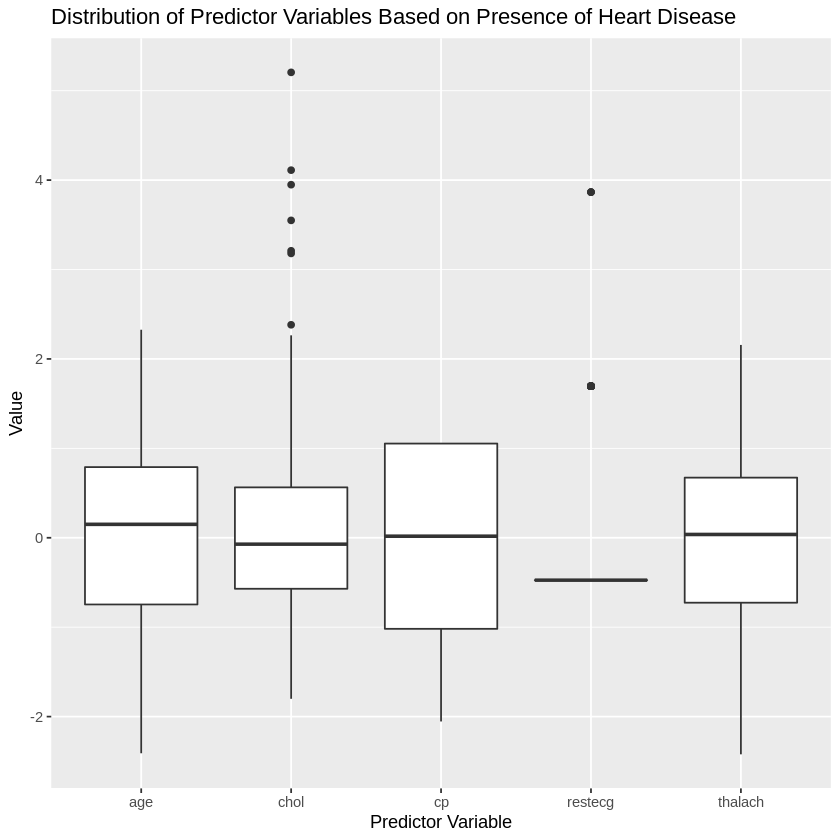

In [33]:
heart_disease_plot <- heart_disease_train |>
    select(age, thalach, chol, restecg, cp, num) |>
    pivot_longer(cols = c(age, thalach, chol, restecg, cp), names_to = "variable", values_to = "value") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot() +
    labs(x = "Predictor Variable", y = "Value", title = "Distribution of Predictor Variables Based on Presence of Heart Disease")

heart_disease_plot

### Methods:

We will first assess the correlation between heart disease diagnosis and the 5 variables through scatter plots. By examining the trend plotted against heart disease, we will select the top 2 numerical variables and the top categorical variable that are most closely associated for an easier display of results. These variables will be scaled and used as parameters for the training classification recipe. Next, we will find the best k-neighbor using cross-validation and plotting k-neighbors (1-50) against their respective accuracy. Once the best k-neighbor is determined, we will train our classification specification model for our classifier. Subsequently, we will assess the accuracy of this model against our test data for the prediction of heart disease diagnosis.

To visualize these results, we will be using scatter plots of the two numerical variables on the x and y axis, where the background color (red/green) indicates the decision of the classifier. If applicable, we may choose to use multiple scatter plots to display the effect of a third variable on the diagnosis. Depending on what the variable is, the number of scatter plots used will correspond to the number of categories or divided range of that variable.

### Expected Outcomes and Significance:

We expect to see people with higher age, lower maximum heart rate, abnormal resting electrocardiographic results, higher cholesterol level, and typical or asymptomatic angina to be more likely diagnosed with heart disease. However, the strength of the association is unknown and will be determined based on our analysis of the data. Identifying the predictability of these common clinical factors may notify individuals in advance of their risk of getting heart disease. This may lead to future questions on how efficient is the alert in preventing disease outcomes, possibly by examining how it lowers these risk factors over time.